In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
from PIL import Image
import time
%matplotlib inline

Using TensorFlow backend.


In [2]:
# the data, split between train and test sets
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training data shape: ", x_train.shape)
print("Training labels shape: ", y_train.shape)
print("Test data shape: ", x_test.shape)
print("Test labels shape: ", y_test.shape)

('Training data shape: ', (60000, 28, 28))
('Training labels shape: ', (60000,))
('Test data shape: ', (10000, 28, 28))
('Test labels shape: ', (10000,))


In [3]:
# input image dimensions
img_rows, img_cols = 28, 28
num_classes = 10

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("Training data shape: ", x_train.shape)
print("Training labels shape: ", y_train.shape)
print("Test data shape: ", x_test.shape)
print("Test labels shape: ", y_test.shape)

('Training data shape: ', (60000, 28, 28, 1))
('Training labels shape: ', (60000, 10))
('Test data shape: ', (10000, 28, 28, 1))
('Test labels shape: ', (10000, 10))


In [4]:
batch_size = 128
epochs = 12

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [5]:
# Save the model according to the conditions  
checkpoint = ModelCheckpoint('MNIST_ConvNet.h5', monitor='val_acc', verbose=1, save_best_only=True, 
                             save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

In [6]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks = [checkpoint, early])


score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 1417s - loss: 0.3323 - acc: 0.8987 - val_loss: 0.0827 - val_acc: 0.9740
Epoch 2/12
60000/60000 [==============================] - 1433s - loss: 0.1163 - acc: 0.9657 - val_loss: 0.0577 - val_acc: 0.9803
Epoch 3/12
60000/60000 [==============================] - 1426s - loss: 0.0879 - acc: 0.9741 - val_loss: 0.0432 - val_acc: 0.9857
Epoch 4/12
 1152/60000 [..............................] - ETA: 1468s - loss: 0.0566 - acc: 0.9826

KeyboardInterrupt: 

In [6]:
#model.save('MNIST_ConvNet.h5')

NameError: name 'model' is not defined

In [7]:
model = load_model('MNIST_ConvNet.h5')

('Image_label:', 2)
('Predicted Label: ', 2)


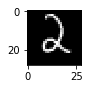

In [8]:
Test_image_number = 47

print("Image_label:", y_test[Test_image_number].argmax())
print("Predicted Label: ", model.predict(x_test[Test_image_number].reshape(1,28,28,1)).argmax())
plt.figure(figsize = (1,1))
plt.imshow(x_test[Test_image_number].reshape(28,28), cmap = 'gray')

('Predicted Label: ', 7)


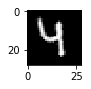

In [9]:
gimp_image = np.array(Image.open('gimp_image.png'))
plt.figure( figsize = (1,1))
plt.imshow(gimp_image, cmap = 'gray')
print("Predicted Label: ", model.predict(gimp_image.reshape(1,28,28,1)/255).argmax())